# 8th Homework
## Theofanis Nitsos - p3352325

## Exercise 1
1, 4

## Exercise 2
1, 4, 5

## Exercise 3
1,2

## Exercise 4
1

## Exercise 5
2,3

## Exercise 6
4

## Exercise 7
1, 4

## Exercise 8
2,3,6

## Exercise 9
4, 6

## Exercise 10
2

## Exercise 11
1,3, 4

## Exercise 12
2, 3, 4

## Exercise 13
2

## Exercise 14
2, 4

## Exercise 15
2, 4

## Exercise 16
2, 3, 5

## Exercise 17
2

## Exercise 18
2,4

## Exercise 19
2,3 

## Exercise 20
2, 4

## Exercise 21
4

## Exercise 22
2, 3

## Exercise 23
1

## Exercise 24
2, 3, 4

## Exercise 25
(a)

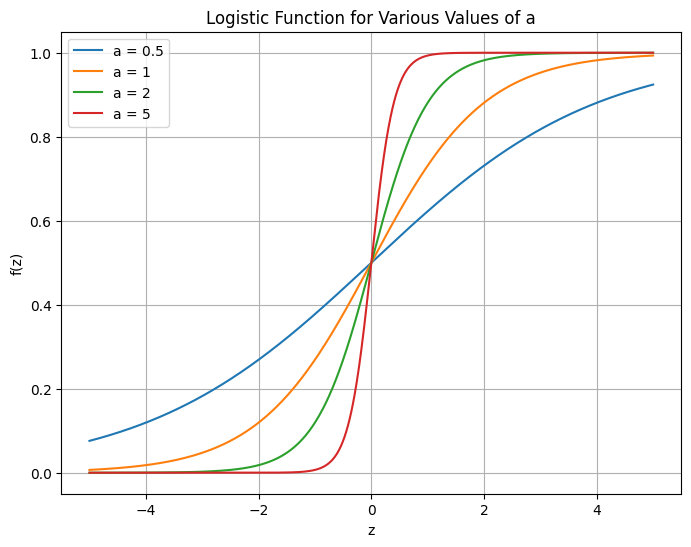

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(z, a):
    return 1 / (1 + np.exp(-a * z))

# Values of z
z_values = np.linspace(-5, 5, 1000)

# Values of a to plot
a_values = [0.5, 1, 2, 5]

# Plot the logistic function for each value of a
plt.figure(figsize=(8, 6))
for a in a_values:
    y_values = logistic_function(z_values, a)
    plt.plot(z_values, y_values, label=f'a = {a}')

# Set labels and title
plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Logistic Function for Various Values of a')
plt.legend()
plt.grid(True)
plt.show()


(b)

We want to minimise the sum of error squares criterion $ SSE = J(\boldsymbol{\theta}) = \sum_{n=1}^N (y_n - f(\boldsymbol{\theta}^T \, \boldsymbol{x_n}))^2 $ with relation to $\boldsymbol{\theta}$. In more detail  

$\frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = - \frac{\partial f(\boldsymbol{\theta}^T \boldsymbol{x})}{\partial \boldsymbol{\theta} } $ using hint (b)  
$\frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = \alpha \, f(\boldsymbol{\theta}^T \boldsymbol{x}) \, (1 - f(\boldsymbol{\theta}^T \boldsymbol{x}))$

- Initialise $\boldsymbol{\theta} = \boldsymbol{\theta}(0)$
- t = 0
    - Repeat
$\boldsymbol{\theta}(t+1) = \boldsymbol{\theta}(t) - \mu \frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} |_{\boldsymbol{\theta} = \boldsymbol{\theta}(t)} = \boldsymbol{\theta}(t) - \mu \, \alpha \, f(\boldsymbol{\theta}^T \boldsymbol{x}) \, (1 - f(\boldsymbol{\theta}^T \boldsymbol{x})) |_{\boldsymbol{\theta} = \boldsymbol{\theta}(t)} $
- Until convergence

(c) 
In practice, for any real number x, the sigmoid function will never exactly reach 0 or 1.The sigmoid function converges asymptotically to 0 and 1.

(d)
Another way to interpret the response of the model is the probability $f(\boldsymbol{\theta}^T \, \boldsymbol{x})$

(e) By increasing the $\alpha$ value in the function $f(z) = \frac{1}{1+exp(-\alpha z)}$ we can make the graph steeper thus leading the model responses very close to 1 or 0.

## Exercise 26

### (a) naive Bayes classifier

#### (i)

In [2]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer, roc_auc_score

In [3]:
Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y= Dataset['train_y']

test_x = Dataset['test_x']
test_y = Dataset['test_y']

In [4]:
print(train_x.shape, train_y.shape)

(200, 2) (200, 1)


In [5]:
df = pd.DataFrame(np.hstack((train_x, train_y)), columns = ['X1', 'X2', 'y'])
y_1 = df[['X1', 'X2']].loc[ df.y == 1].to_numpy()
y_2 = df[['X1', 'X2']].loc[ df.y == 2].to_numpy()

df_test = pd.DataFrame(np.hstack((test_x, test_y)), columns = ['X1', 'X2', 'y'])
y_1_test = df_test[['X1', 'X2']].loc[ df_test.y == 1].to_numpy()
y_2_test = df_test[['X1', 'X2']].loc[ df_test.y == 2].to_numpy()

## Class 1
mean_11 = y_1[:,0].mean()
mean_12 = y_1[:,1].mean()
s11 = np.power((y_1[:,0]-mean_11), 2).mean()
s12 = np.power((y_1[:,1]-mean_12), 2).mean()

## Class 2
mean_21 = y_2[:,0].mean()
mean_22 = y_2[:,1].mean()
s21 = np.power((y_2[:,0]-mean_21), 2).mean()
s22 = np.power((y_2[:,1]-mean_22), 2).mean()

print(len(y_1[:,0]), len(y_2[:,0]))

100 100


Since both $y_1$ and $y_2$ have the same number of samples $P(\omega_1) = P(\omega_2) = 0.5$  

Below we will calculate $p(x \vert \omega)$

In [6]:
# Parametric approach
gm_1 = GaussianMixture(n_components=1, random_state=0).fit(y_1)
mean_1 = gm_1.means_[0]
cov_1 = gm_1.covariances_[0]

# Parametric approach
gm_1 = GaussianMixture(n_components=1, random_state=0).fit(y_2)
mean_2 = gm_1.means_[0]
cov_2 = gm_1.covariances_[0]

#### (ii), (iii)

In [24]:
def plot_results(test_y, test_x, df_result_wrong):
    # define color pattern 
    color = pd.Series( test_y.flatten()).apply(lambda x: 'C0' if x == 1 else 'C1')
    # Create patches for the legend
    patches = [ mpatches.Patch(color = 'C0', label = 'Class 1'), mpatches.Patch(color = 'C1', label = 'Class 2'),  
                mpatches.Patch(color = 'r', label = 'Incorect Classification')
                ]


    #plot X data
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ax.scatter(test_x[:,0], test_x[:,1], c=color)
    ax.scatter(df_result_wrong[:,0], df_result_wrong[:,1], c='r', marker = 'x', s=100)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    _ = ax.legend(handles = patches,loc = 'upper left', bbox_to_anchor=(0.73, 0, 0, 1))

The ratio of incorectly classified points to total points is:  0.465
The error classification probability is:  0.5349999999999999


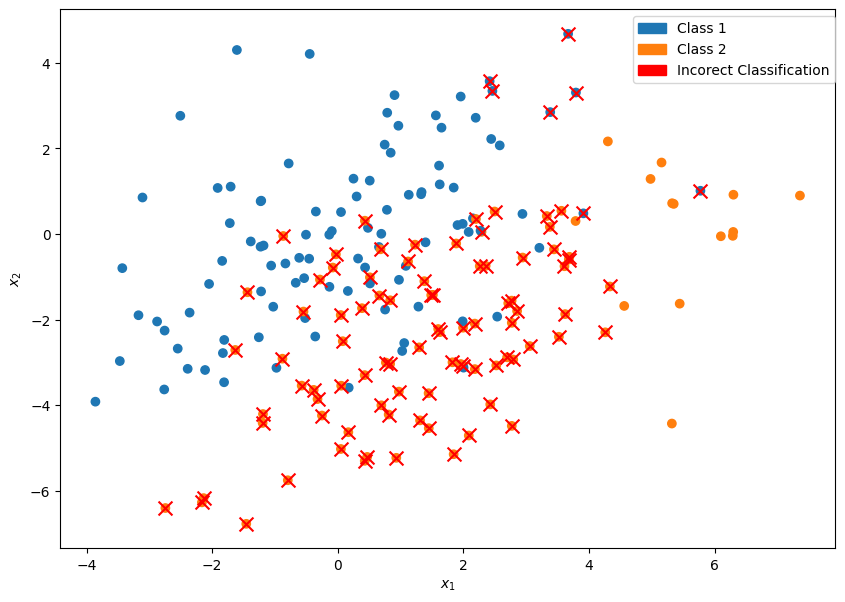

In [25]:
NBtest_y = []
for x in test_x:
    g_1 = norm.pdf(x[0], loc=mean_11, scale=s11) * norm.pdf(x[1], loc=mean_12, scale=s12)
    g_2 = norm.pdf(x[0], loc=mean_21, scale=s21) * norm.pdf(x[1], loc=mean_21, scale=s21)
    if g_1 > g_2:
        NBtest_y.append(1)
    else:
        NBtest_y.append(2)
        
NBtest_y = np.array(NBtest_y)
df_result = pd.DataFrame(np.hstack((test_x, (NBtest_y.reshape(-1,1) - test_y))), columns = ['X1', 'X2', 'y'])
df_result_wrong = df_result[['X1', 'X2']].loc[ df_result.y != 0].to_numpy() 

plot_results(test_y, test_x, df_result_wrong)   

print("The ratio of incorectly classified points to total points is: ", len(df_result_wrong)/len(df_result))
print("The error classification probability is: ", 1- len(df_result_wrong)/len(df_result))

### (b)  k-nearest neighbor

for k = 5

The ratio of incorectly classified points to total points is:  0.17
The error classification probability is:  0.83


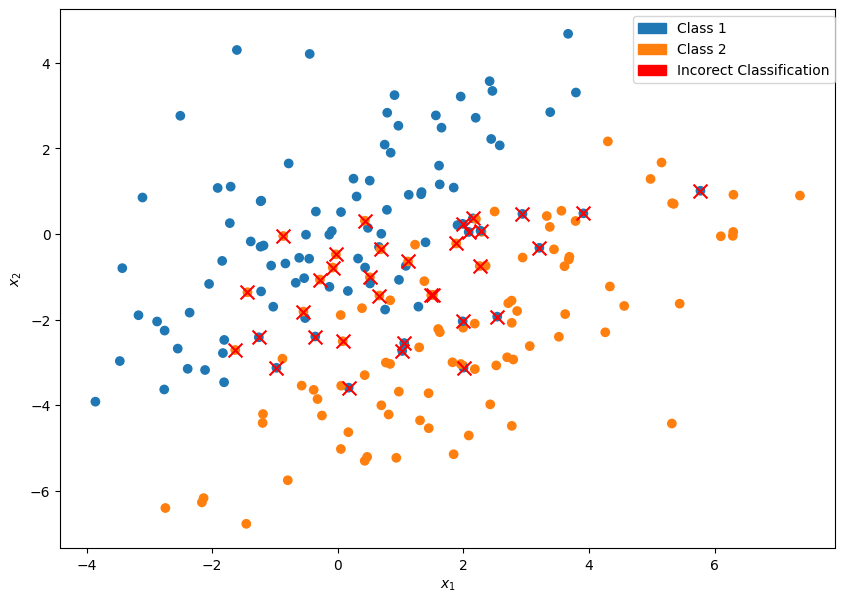

In [26]:
# We will use the default python library
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_x, train_y.ravel())
knntest_y = np.array(neigh.predict(test_x), dtype=int) 

df_result = pd.DataFrame(np.hstack((test_x, (knntest_y.reshape(-1,1) - test_y))), columns = ['X1', 'X2', 'y'])
df_result_wrong = df_result[['X1', 'X2']].loc[ df_result.y != 0].to_numpy()        

plot_results(test_y, test_x, df_result_wrong)   

print("The ratio of incorectly classified points to total points is: ", len(df_result_wrong)/len(df_result))
print("The error classification probability is: ", 1- len(df_result_wrong)/len(df_result))

### (c) Depict the training set

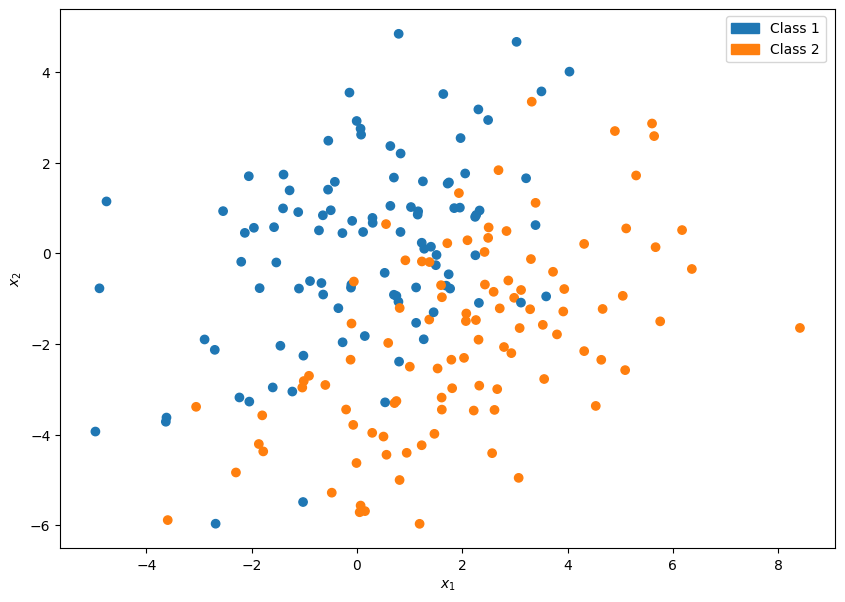

In [22]:
# define color pattern 
color = pd.Series(train_y.flatten()).apply(lambda x: 'C0' if x == 1 else 'C1')
# Create patches for the legend
patches = [ mpatches.Patch(color = 'C0', label = 'Class 1'), mpatches.Patch(color = 'C1', label = 'Class 2') ]


#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.scatter(train_x[:,0], train_x[:,1], c=color)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
_ = ax.legend(handles = patches,loc = 'upper left', bbox_to_anchor=(0.85, 0, 0, 1))

(d) Report the classification results obtained by (a) the Bayes classifier (from previous exercise), (b) the above classifiers and comment  

Using the classification error as criterion, the Bayes classifier is the best followed closely by the K-nearest neighbour. The Naive bayes performance is significantly worse than the other 2 classifiers.

The Naive Bayes classifier operates under the assumption that all features are statistically independent from each other. If this is the case the covariance matrix of the Bayes classifier would be diagonal and the expression of the pdf could be expressed in the same manner for both the Naive and typical Bayes classifier.

Further the k-NN classifier error (assuming that k remains a fraction of N) will tend to reach the bayesian probability of error for $k \rightarrow \infty$